In [1]:
# 1. 기본 데이터 처리, 정규식, 문자열처리 라이브러리
import numpy as np
import pandas as pd
import re
import string

# 2. 텍스트 처리 라이브러리
import nltk
from nltk.corpus import stopwords
import konlpy
from konlpy.tag import Okt

# 3. 문자 빈도, 문자특성 추출, 워드클라우드
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from itertools import chain

# 4. 데이터문서 및 날짜처리 라이브러리
from itertools import chain
import pickle
from datetime import datetime

# 5. 도표 및 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import sys
import datetime
import os
import requests
from bs4 import BeautifulSoup
import re
import pdb

# 작업 폴더 재설정(분석할 파일이나 corpus 있는 곳,)
WORK_HOME = r'C:\Users\Yun\Desktop\23-1학기\job'
os.chdir(WORK_HOME)   # 작업 폴더 이동 (UTagger 초기화: 사전 및 dll 라이브러리 interface 호출)

In [2]:
df = pd.read_csv('df.csv', encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1947 non-null   object
 1   Company   4326 non-null   object
 2   Content   4081 non-null   object
 3   Link      4326 non-null   object
 4   Location  2063 non-null   object
 5   label     4326 non-null   object
dtypes: object(6)
memory usage: 202.9+ KB


In [4]:
df.head()

,Title,Company,Content,Link,Location,label
0,NaN,(주)이음인터렉티브,2023 신규채용\n# 데이터사이언티스트\n# 데이터엔지니어 \n㈜이음인터렉티브는 ...,https://www.saramin.co.kr/zf_user/jobs/relay/v...,"(06621) 서울 서초구 강남대로 369, 12층\n신분당선 강남역에서 200m 이내",데이터 사이언티스트
1,NaN,데이콘(주),데이터 사이언티스트 인턴 채용(채용 시 조기 마감)\n\n\n\n\n모집부문 및 상...,https://www.saramin.co.kr/zf_user/jobs/relay/v...,"(07237) 서울 영등포구 은행로 3 익스콘벤처타워, 901호(여의도동)\n서울 ...",데이터 사이언티스트
2,NaN,(주)위키드스톰,데이터 사이언티스트 경력직 채용\n\n\n\n\n모집부문 및 상세내용\n데이터 사이...,https://www.saramin.co.kr/zf_user/jobs/relay/v...,(07788) 서울 강서구 마곡중앙로 161-8 두산더랜드파크 8층 819호(마곡동...,데이터 사이언티스트
3,NaN,(주)카비,"◆ CARVI News\n\n[ZDNet Korea] 카비-교통장애인협회, AI로 ...",https://www.saramin.co.kr/zf_user/jobs/relay/v...,(153-788) 서울 금천구 가산동 벽산디지털밸리5차 301호,데이터 사이언티스트
4,NaN,(주)핀커스코리아,[기업소개] \n- 이커머스에 특화된 AI/빅데이터 플랫폼 기업\n- 차별화 된 비...,https://www.saramin.co.kr/zf_user/jobs/relay/v...,(135-080) 서울 강남구 역삼동 736-42 예동빌딩 8층\n서울 2호선 역삼...,데이터 사이언티스트


In [5]:
ds_df = df.groupby('label').get_group("데이터 사이언티스트")
da_df = df.groupby('label').get_group("데이터 애널리스트")
de_df = df.groupby('label').get_group("데이터 엔지니어")

In [6]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 2894
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     359 non-null    object
 1   Company   451 non-null    object
 2   Content   446 non-null    object
 3   Link      451 non-null    object
 4   Location  87 non-null     object
 5   label     451 non-null    object
dtypes: object(6)
memory usage: 24.7+ KB


In [7]:
da_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 92 to 3194
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     347 non-null    object
 1   Company   470 non-null    object
 2   Content   443 non-null    object
 3   Link      470 non-null    object
 4   Location  114 non-null    object
 5   label     470 non-null    object
dtypes: object(6)
memory usage: 25.7+ KB


In [8]:
de_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405 entries, 215 to 4325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1241 non-null   object
 1   Company   3405 non-null   object
 2   Content   3192 non-null   object
 3   Link      3405 non-null   object
 4   Location  1862 non-null   object
 5   label     3405 non-null   object
dtypes: object(6)
memory usage: 186.2+ KB


In [9]:
ds_df = ds_df.reset_index(drop=True)
da_df = da_df.reset_index(drop=True)
de_df = de_df.reset_index(drop=True)

In [10]:
okt = konlpy.tag.Okt()

def clean_korean_documents(documents):

    for i, document in enumerate(documents):
            # 1. 텍스트 정제 (HTML 태그 제거)
            document = str(document)

            # 2. 텍스트 정제 (특수기호 제거)
            #pdb.set_trace()
            document = re.sub(r'[^ ㄱ-ㅎㅣ가-힣]', ' ', document) # 한글, blank 외의 문자= > 제거특수기호 제거
            document = re.sub(r'(\s+)',' ', document)  # 연속적인 ' ' 를 하나로 

            # 3. 텍스트 정제 (형태소 추출)
            clean_words = []
            for word in okt.pos(document, stem=True): #어간 추출
                if word[1] in ['Noun', 'Adjective']: #명사, 형용사 okt.tagsets 참조
                    clean_words.append(word[0])
                    
            documents[i] = clean_words               # 이 경우 join 되지 않은 리스트 생성 ( ','로 구분 리스트)
    return documents

def clean_english_documents(documents):

    for i, document in enumerate(documents):
        document = str(document)
        
        # 영문자 이외 문자는 공백으로 변환
        document = re.sub(r'[^ a-zA-Z]+', '', document)  #영문 제외
        document = re.sub(r'(\s+)',' ', document)  # 연속적인 ' ' 를 하나로 


        # 소문자 변환
        no_capitals = document.lower().split()

        # 불용어 제거
        stops = set(stopwords.words('english'))
        no_stops = [word for word in no_capitals if not word in stops]
        
        
        documents[i] = no_stops
    return documents

def lengthTxt(func):
    newTxt = []
    for doc in func:
        filteredTxt = [w for w in doc if len(w) > 1]
        newTxt.append(filteredTxt)
    return newTxt

# stopword 제거
def replaceTxt(func, old, new):
    newList = []
    for doc in func:
        newTxt = []
        for w in doc:
            newTxt.append(w.replace(old, new))
        newList.append(newTxt)
    return newList

# 문서별 선정된 어휘를 하나의 문장으로 연결
def joinTxt(func):
    newTxt = []
    for doc in func:
        newTxt.append(" ".join(doc))
    return newTxt

In [11]:
datasets = [ds_df, da_df, de_df]
languages = ['Korean', 'English']

cleaned_texts = {}

for dataset in datasets:
    dataset_name = dataset.index.name
    for lang in languages:
        content = dataset['Content'].copy()
        cleaned_text = None
        
        if lang == 'Korean':
            cleaned_text = clean_korean_documents(content)
        elif lang == 'English':
            cleaned_text = clean_english_documents(content)
        
        finished_text = lengthTxt(cleaned_text)
        finished_text_join = joinTxt(finished_text)
        
        key = f"{dataset_name}_{lang}"
        cleaned_texts[key] = finished_text_join


In [12]:
# Copy content of dataframes into variables
DS_K, DS_E = ds_df['Content'].copy(), ds_df['Content'].copy()
DA_K, DA_E = da_df['Content'].copy(), da_df['Content'].copy()
DE_K, DE_E = de_df['Content'].copy(), de_df['Content'].copy()

# Clean documents
Cleaned_DS_K, Cleaned_DS_E = clean_korean_documents(DS_K), clean_english_documents(DS_E)
Cleaned_DA_K, Cleaned_DA_E = clean_korean_documents(DA_K), clean_english_documents(DA_E)
Cleaned_DE_K, Cleaned_DE_E = clean_korean_documents(DE_K), clean_english_documents(DE_E)

# Get length of cleaned documents
Finished_DS_K, Finished_DA_K, Finished_DE_K = lengthTxt(Cleaned_DS_K), lengthTxt(Cleaned_DA_K), lengthTxt(Cleaned_DE_K)

# Join words in documents
Finished_DS_K_JOIN, Finished_DS_E_JOIN = joinTxt(Finished_DS_K), joinTxt(Cleaned_DS_E)
Finished_DA_K_JOIN, Finished_DA_E_JOIN = joinTxt(Finished_DA_K), joinTxt(Cleaned_DA_E)
Finished_DE_K_JOIN, Finished_DE_E_JOIN = joinTxt(Finished_DE_K), joinTxt(Cleaned_DE_E)

# Save cleaned and processed data to binary files
for name, data in [('Finished_DS_K', Finished_DS_K), ('Cleaned_DS_E', Cleaned_DS_E),                    ('Finished_DA_K', Finished_DA_K), ('Cleaned_DA_E', Cleaned_DA_E),                    ('Finished_DE_K', Finished_DE_K), ('Cleaned_DE_E', Cleaned_DE_E),                    ('Finished_DS_K_JOIN', Finished_DS_K_JOIN), ('Finished_DS_E_JOIN', Finished_DS_E_JOIN),                   ('Finished_DA_K_JOIN', Finished_DA_K_JOIN), ('Finished_DA_E_JOIN', Finished_DA_E_JOIN),                   ('Finished_DE_K_JOIN', Finished_DE_K_JOIN), ('Finished_DE_E_JOIN', Finished_DE_E_JOIN)]:
    with open(f'{name}.bin', 'wb') as fp:
        pickle.dump(data, fp)

# Load data from binary files
ds_k_word, ds_e_word = pickle.load(open('Finished_DS_K_JOIN.bin', 'rb')), pickle.load(open('Finished_DS_E_JOIN.bin', 'rb'))
da_k_word, da_e_word = pickle.load(open('Finished_DA_K_JOIN.bin', 'rb')), pickle.load(open('Finished_DA_E_JOIN.bin', 'rb'))
de_k_word, de_e_word = pickle.load(open('Finished_DE_K_JOIN.bin', 'rb')), pickle.load(open('Finished_DE_E_JOIN.bin', 'rb'))


In [13]:
def get_word_count(word_list):
    cv = CountVectorizer(max_features=200)
    word_vec = cv.fit_transform(word_list)
    words = cv.get_feature_names()
    count_mat = word_vec.sum(axis=0)
    count = np.squeeze(np.asarray(count_mat))
    return list(zip(words, count))

word_count_ds_k = get_word_count(ds_k_word)
word_count_ds_e = get_word_count(ds_e_word)
word_count_da_k = get_word_count(da_k_word)
word_count_da_e = get_word_count(da_e_word)
word_count_de_k = get_word_count(de_k_word)
word_count_de_e = get_word_count(de_e_word)

C:\Users\Yun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
def get_word_count(word_list):
    cv = CountVectorizer(max_features=200)
    word_vec = cv.fit_transform(word_list)
    words = cv.get_feature_names()
    count_mat = word_vec.sum(axis=0)
    count = np.squeeze(np.asarray(count_mat))
    return sorted(list(zip(words, count)), key=lambda x:x[1], reverse=True)

word_count_ds_k = get_word_count(ds_k_word)
word_count_ds_e = get_word_count(ds_e_word)
word_count_da_k = get_word_count(da_k_word)
word_count_da_e = get_word_count(da_e_word)
word_count_de_k = get_word_count(de_k_word)
word_count_de_e = get_word_count(de_e_word)


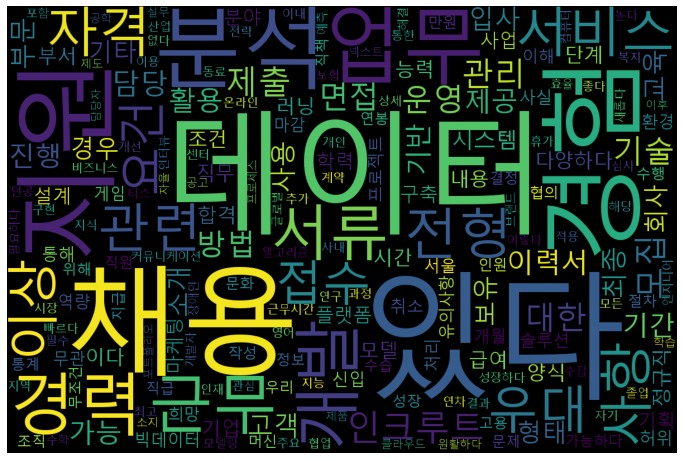

<Figure size 432x288 with 0 Axes>

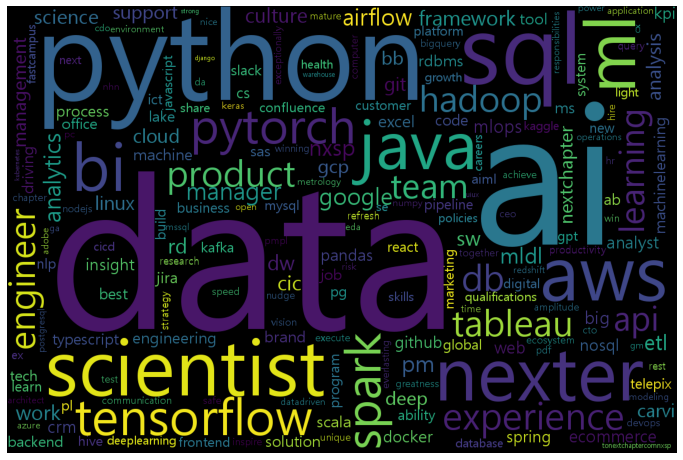

<Figure size 432x288 with 0 Axes>

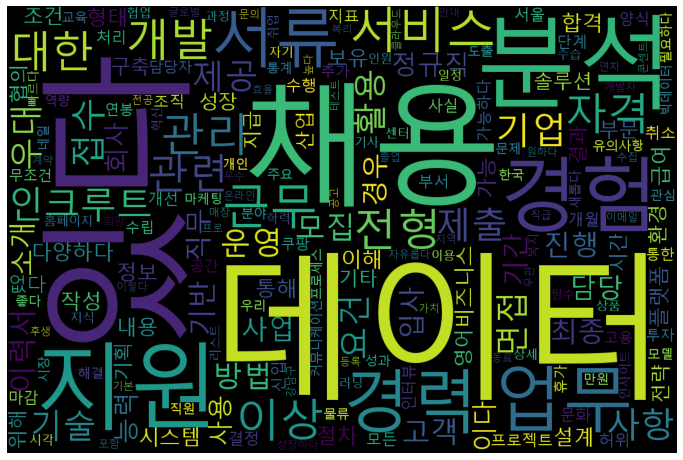

<Figure size 432x288 with 0 Axes>

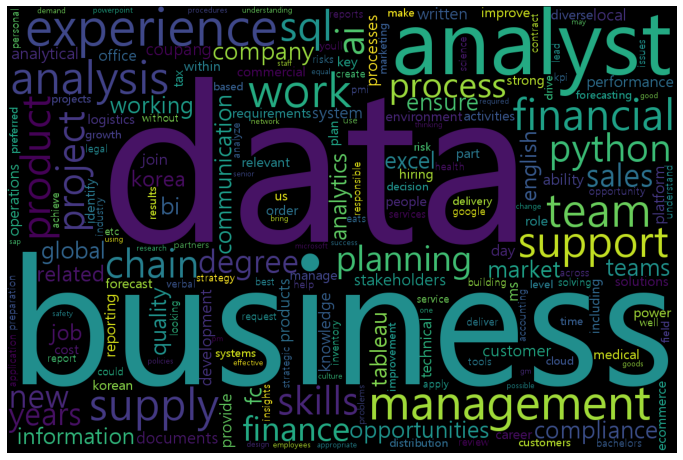

<Figure size 432x288 with 0 Axes>

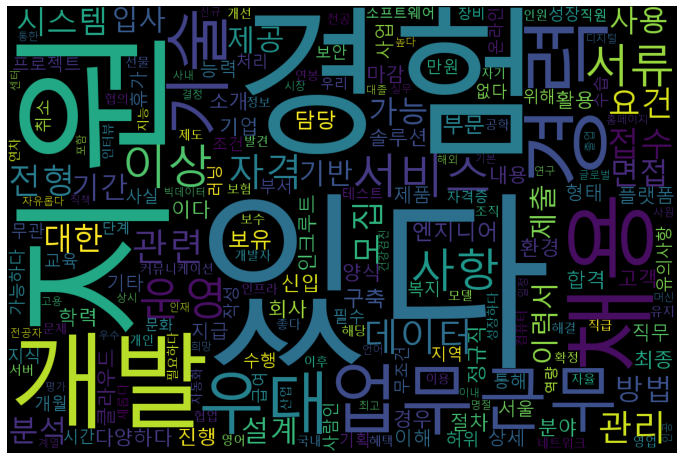

<Figure size 432x288 with 0 Axes>

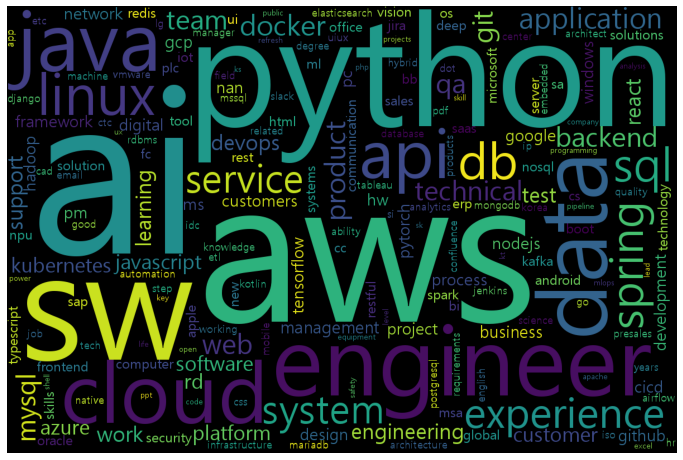

<Figure size 432x288 with 0 Axes>

In [15]:
def generate_word_cloud(word_count, filename):
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='black', width=1200, height=800)
    cloud = wc.generate_from_frequencies(dict(word_count))
    
    plt.figure(figsize=(12,12))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
    plt.savefig(filename, bbox_inches='tight')

generate_word_cloud(word_count_ds_k, 'DS_K.png')
generate_word_cloud(word_count_ds_e, 'DS_E.png')
generate_word_cloud(word_count_da_k, 'DA_K.png')
generate_word_cloud(word_count_da_e, 'DA_E.png')
generate_word_cloud(word_count_de_k, 'DE_K.png')
generate_word_cloud(word_count_de_e, 'DE_E.png')
